# GRAPHICAL ANALYSIS OF THE TeFE MODEL

## Prepping up

In [4]:
import pandas as pd
import numpy as np
import csv
import pickle
from pyspark.sql import SparkSession
import json
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from icecream import ic
from sklearn.linear_model import LinearRegression
from plotly.subplots import make_subplots
from operator import add
import kaleido
import plotly.io as pio

###  Heat maps & graphs (comparison)

In [92]:
agent_dict_df = pd.DataFrame(agent_dict)
total = agent_dict_df
total = total.T
total = total.reset_index()
total.columns = ['Type',
                                 'intercept',
                                 'coeficient',
                                 'points above',
                                 'points below',
                                 'score']
total = total.sort_values(by=['Type'])
total['Number'] = [int(str(i).split(' - ')[0]) for i in total['Type']]
total['Type'] = [str(i).split(' - ')[1]+ ' -- ' + str(i).split(' - ')[2] for i in total['Type']]
total['Type'] = [str(i).split('.html')[0] for i in total['Type']]
total = total.sort_values(by=['Number'])
total = total.astype({'intercept':'float','coeficient':'float', 'points above':'float', 'points below':'float', 'score':'float'})
total

Type  intercept  coeficient  \
55   Full homogeneity -- speeds of Adaptations of p...   0.013392    0.088305   
0    Half homogeneity -- speeds of Adaptations of p...   0.011695    0.197789   
120  Just energy policy maker -- speeds of Adaptati...   0.014212   -0.000039   
175  Just public bank -- speeds of Adaptations of p...   0.012370    0.147981   
230  No homogeneity -- speeds of Adaptations of pol...   0.012722    0.157015   
..                                                 ...        ...         ...   
54   Half homogeneity -- Profits of firms in relati...   0.204739    1.698535   
109  Full homogeneity -- Profits of firms in relati...   0.178986    1.719072   
284  No homogeneity -- Profits of firms in relation...   0.160640    1.775804   
119  No policy maker -- Profits of firms in relatio...   0.561068   -1.488675   
229  Just public bank -- Profits of firms in relati...   0.373889    1.109132   

     points above  points below      score  Number  
55       0.524229      0.475771  -0.054361       0  
0        0.616740      0.378855  -0.065937       0  
120      0.334906      0.665094   0.008186       0  
175      0.568282      0.431718  -0.042992       0  
230      0.387665      0.612335  -0.005093       0  
..            ...           ...        ...     ...  
54       0.046025      0.953975  40.982795      54  
109      0.050209      0.949791  39.844427      54  
284      0.050209      0.949791  38.629355      54  
119      0.062762      0.937238  60.638682      54  
229      0.054393      0.945607  49.235449      54  

[285 rows x 7 columns]

In [258]:
fig = go.Figure(data=go.Heatmap(z=normal_df, y=normal_df.index,
                                x=['intercept','coef','points_below','points_above','above_score','below_score'],
                                colorscale='Viridis',
                                text =df.values.tolist(), texttemplate="%{text}", textfont={"size":20}))
fig.show()

<ipython-input-101-df2014ba542c>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


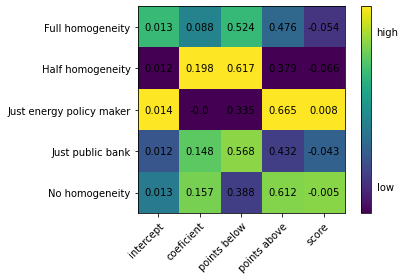

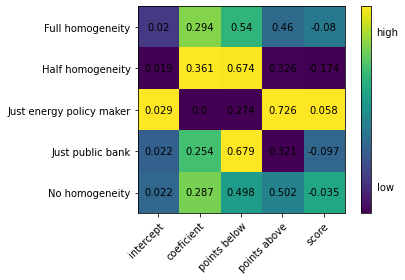

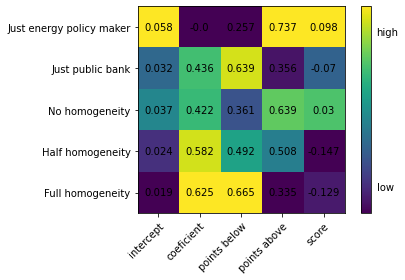

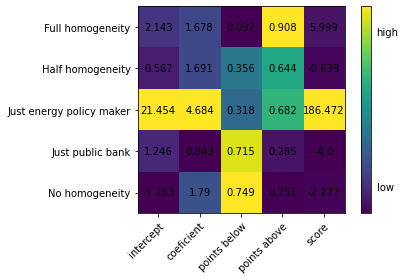

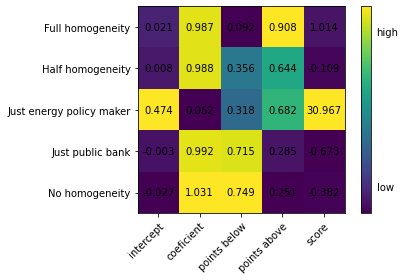

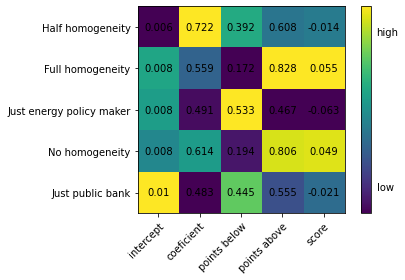

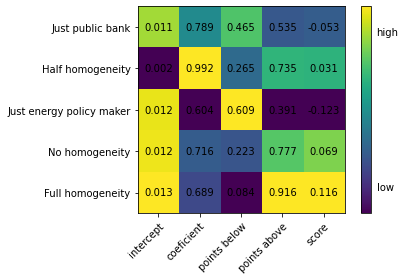

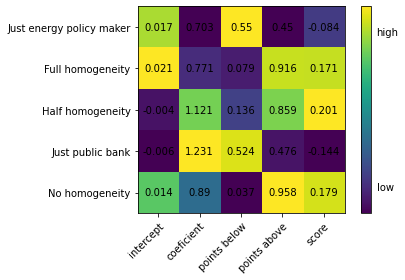

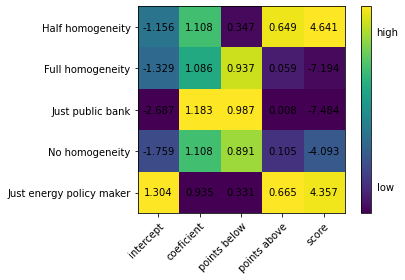

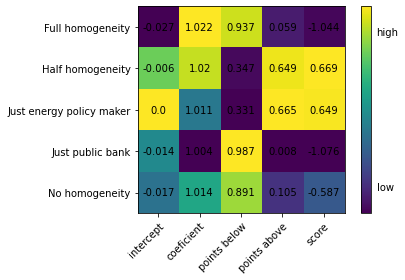

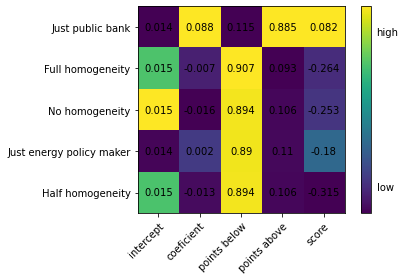

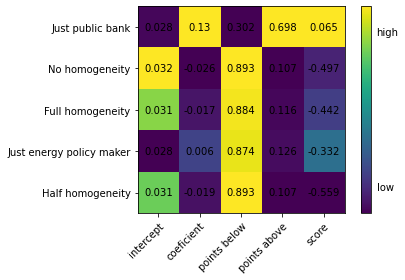

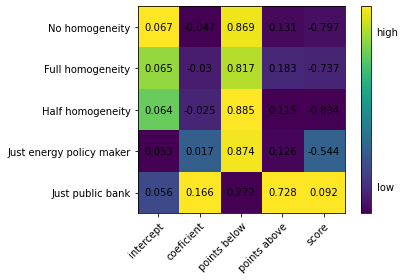

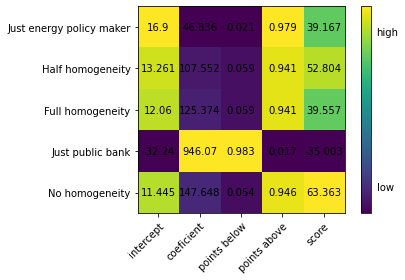

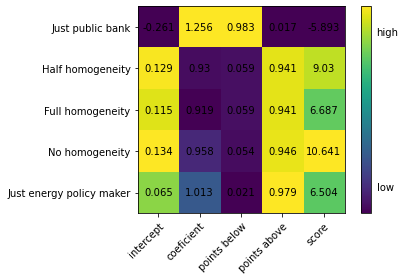

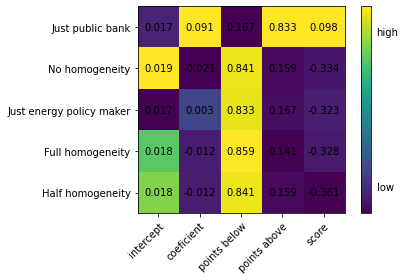

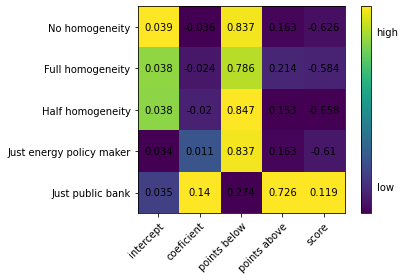

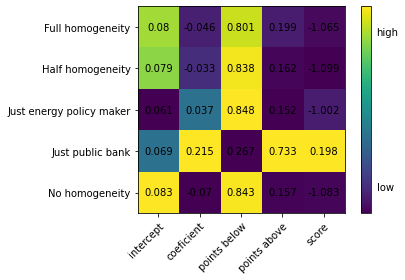

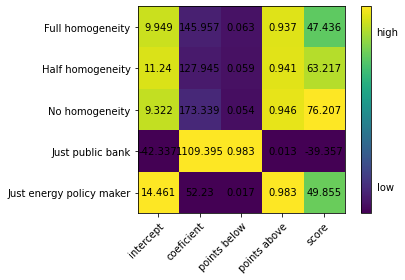

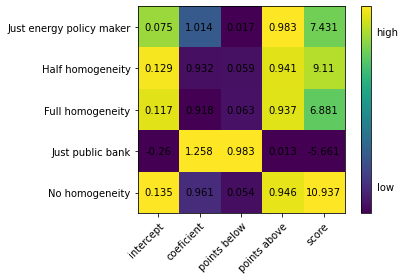

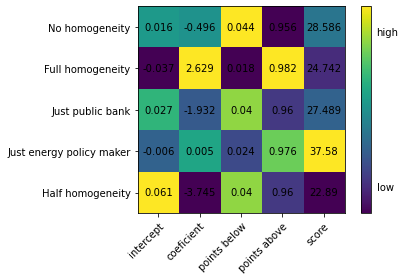

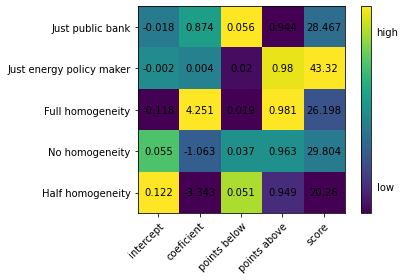

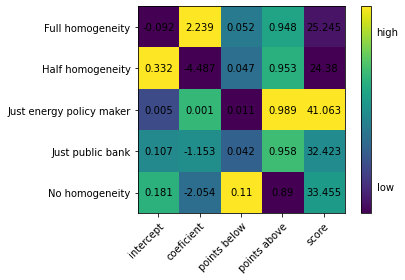

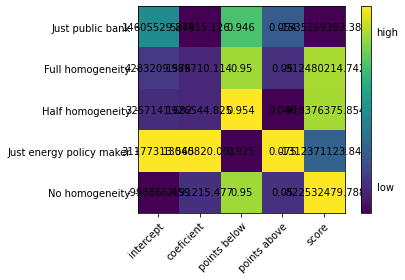

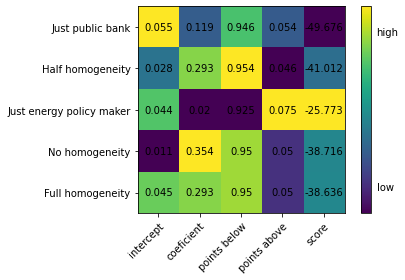

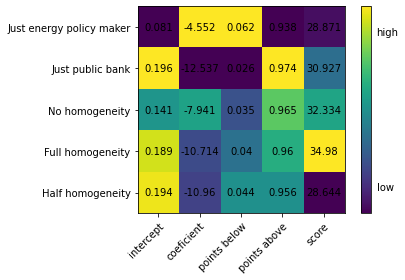

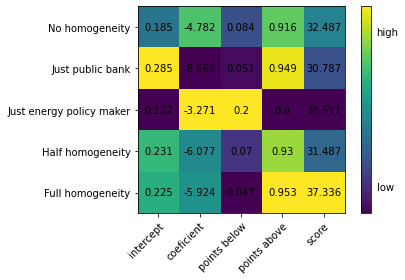

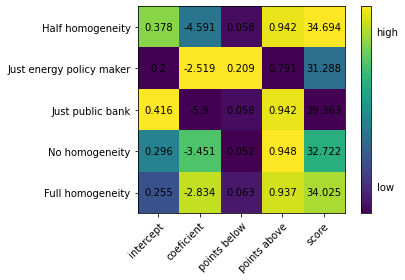

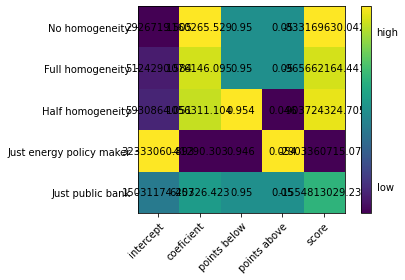

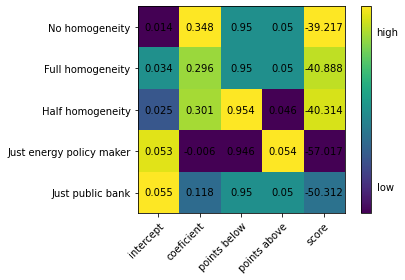

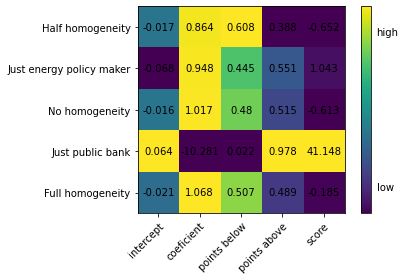

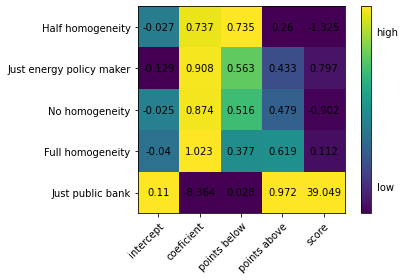

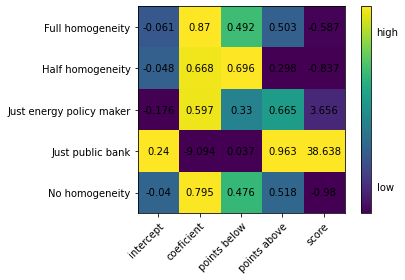

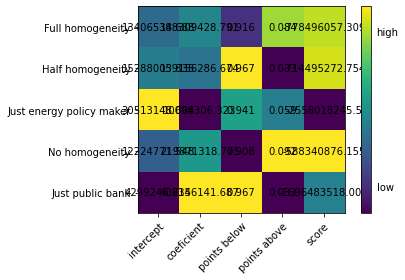

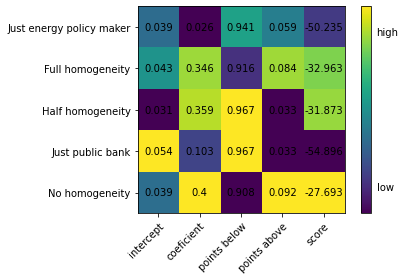

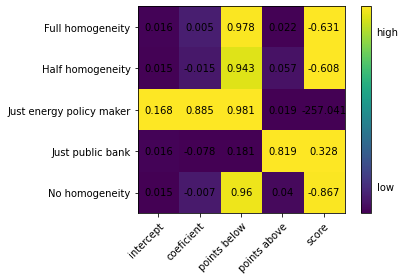

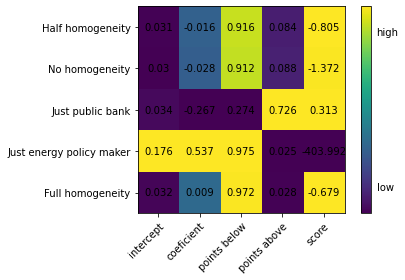

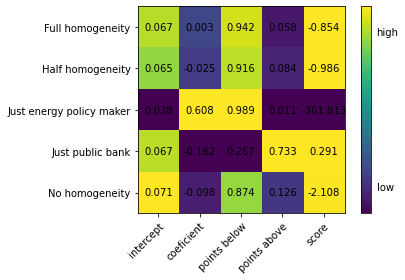

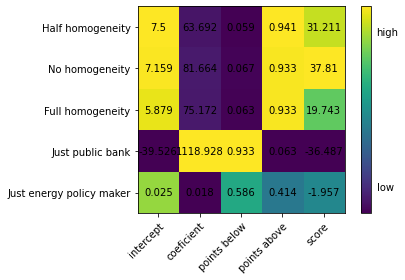

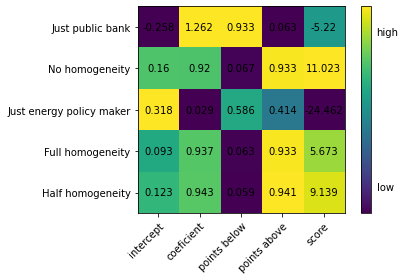

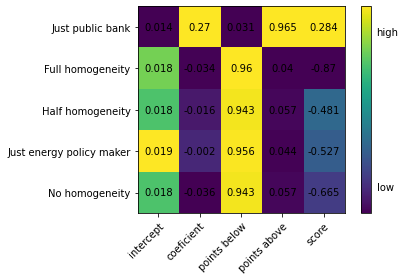

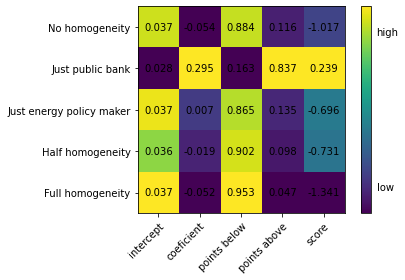

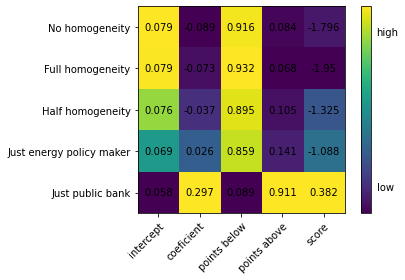

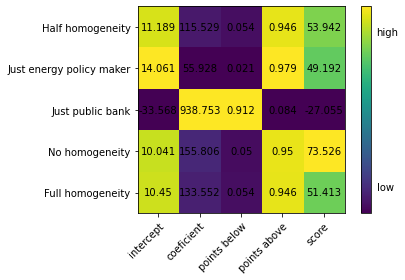

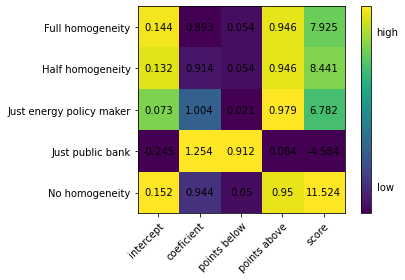

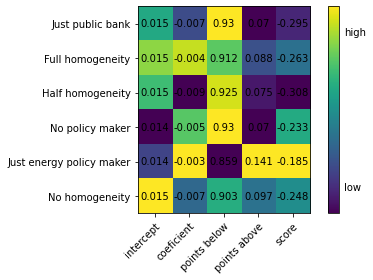

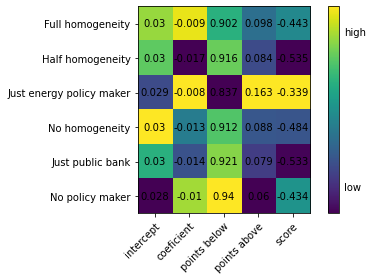

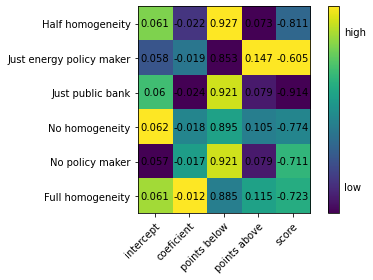

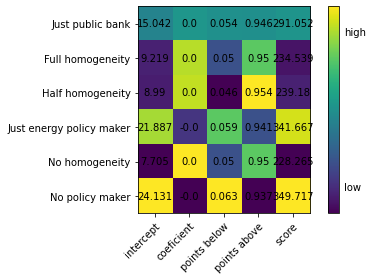

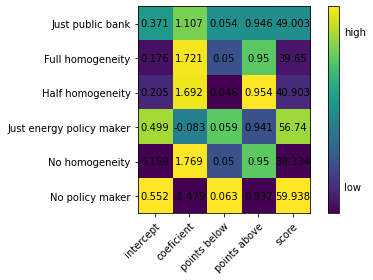

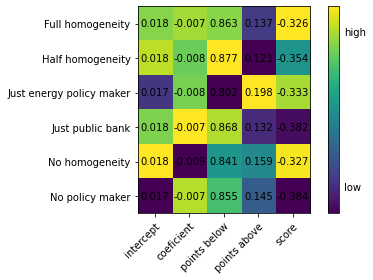

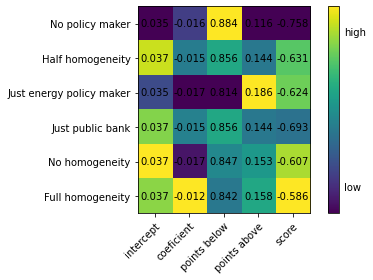

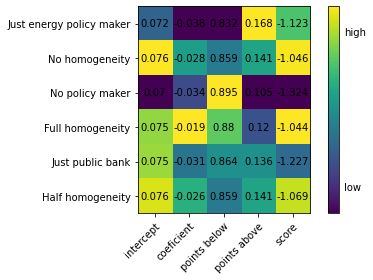

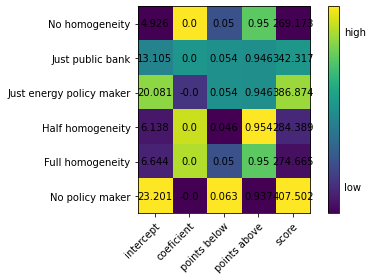

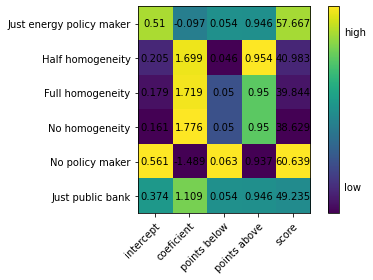

In [101]:
for number in total.Number.unique():

    df = pd.DataFrame(total.loc[total['Number'] == number]).set_index(['Type']).drop(['Number'], axis=1)

    _df = df + abs(df.min())

    _df.index = [str(i).split(' -- ')[0] for i in _df.index]

    normal_df = (_df-_df.min())/(_df.max()-_df.min())


    fig, ax = plt.subplots()
    im = ax.imshow(normal_df)

    ax.set_xticks(np.arange(len(normal_df.columns)), labels=normal_df.columns)
    ax.set_yticks(np.arange(len(normal_df.index)), labels=normal_df.index)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    title = str(df.index[0]).split(' -- ')[1]
    # plt.title(title)

    for j in range(len(normal_df.columns)):
        for i in range(len(normal_df.index)):
            text = ax.text(j, i, round(df.iloc[i, j],3),
                           ha="center", va="center", color="black")

    cbar = plt.colorbar(im)

    cbar.ax.get_yaxis().set_ticks([])
    for j, lab in enumerate(['low',' ',' ','high']):
        cbar.ax.text(1.5, (2 * j + 1) / 8.0, lab, ha='left', va='center')
        cbar.ax.get_yaxis().labelpad = 15

    fig.tight_layout()

    font = {'family' : 'arial',
            'size'   : 9}

    # plt.show()
    fig.savefig('Figures/heatmaps/' + str(number) + ' ' + title, dpi=1000)

In [11]:
def normalize(_list):

    min_var = min(_list)
    if np.any(np.array(_list) < 0):

        _list = [i + abs(min_var) for i in _list]
        min_var = 0

    max_var = max(_list)

    denominator = max_var - min_var if max_var != min_var else 1

    _list = [(i - min_var)/denominator for i in _list]

    return _list

In [13]:
def normalize(_list):

    _list = np.array(_list)

    min_var = min(_list)
    if np.any(_list < 0):

        _list = _list + abs(min_var)
        min_var = 0
    print(min_var)
    max_var = max(_list)

    denominator = (max_var - min_var) if max_var != min_var else 1
    print(_list)
    _list = _list - min_var
    print(_list)
    _list = _list / denominator
    print(_list)

    # _list = [(i - min_var)/denominator for i in _list]

    return _list

In [14]:
_list = [1,2,3,4,9, -225]


normalize(_list)

0
[226 227 228 229 234   0]
[226 227 228 229 234   0]
[0.96581197 0.97008547 0.97435897 0.97863248 1.         0.        ]


array([0.96581197, 0.97008547, 0.97435897, 0.97863248, 1.        ,
       0.        ])

In [12]:
_list = [1,2,3,4,9, -225]


normalize(_list)

[0.9658119658119658,
 0.9700854700854701,
 0.9743589743589743,
 0.9786324786324786,
 1.0,
 0.0]

In [2]:
def load_into_df(_file):
    if 'pkl' in _file:
        with open(_file, 'rb') as f:
            df = pickle.load(f)
    elif 'csv' in _file:
        df = pd.read_csv (_file)
    elif 'feather' in _file:
        df = pd.read_feather(_file)
    elif 'parquet' in _file:
        df = pd.read_parquet(_file)
    else:
        print('not loaded, format unsupported')
        df = pd.DataFrame(['Not loaded', 'format unsupported'])

    return df

In [6]:
## Table analysis

In [4]:
mix_df = load_into_df(dfs['mix'])
# contracts_df = load_into_df('normal_contracts____NONE_YES_YES.csv')
# technologic_df = load_into_df('normal_technologic____NONE_YES_YES.csv')
agents_df = load_into_df(dfs['agents'])

NameError: name 'dfs' is not defined

In [ ]:
print('lines, ', mix_df.shape[0])
print('columns, ', mix_df.shape[1])
columns_mix_df = list(mix_df[:])
print('columns are:', columns_mix_df)
print('Number of unique rows:', len(mix_df.entry.unique()))
mix_df.head()

In [ ]:
agents_df.groupby(['period'],as_index=False)['shareholder_money'].sum().groupby(['period'], as_index=False).quantile(0.5)

In [ ]:
print('lines, ', agents_df.shape[0])
print('columns, ', agents_df.shape[1])
columns_agents_df = list(agents_df[:])
print('columns are:', columns_agents_df)
print('Number of unique rows:', len(agents_df.entry.unique()))
agents_df[:len(agents_df.entry.unique())]

In [ ]:
print('lines, ', contracts_df.shape[0])
print('columns, ', contracts_df.shape[1])
columns_contracts_df = list(contracts_df[:])
print('columns are:', columns_contracts_df)
print('Number of unique rows:', len(contracts_df.entry.unique()))
contracts_df.head()

In [ ]:
print('lines, ', technologic_df.shape[0])
print('columns, ', technologic_df.shape[1])
columns_technologic_df = list(technologic_df[:])
print('columns are:', columns_technologic_df)
print('Number of unique rows:', len(technologic_df.entry.unique()))
technologic_df[:len(technologic_df.entry.unique())]

In [ ]:
max_period = mix_df.period.max()
min_period = mix_df.period.min()

In [ ]:
main_agents_df_median = agents_df.groupby(["period", 'genre'], as_index=False)[columns_agents_df].median()
print(main_agents_df_median.head())

main_agents_df_mean = agents_df.groupby(["period", 'genre'], as_index=False)[columns_agents_df].mean()
print(main_agents_df_mean.head())

main_agents_df_25quart = agents_df.groupby(["period", 'genre'], as_index=False)[columns_agents_df].quantile(.25)
print(main_agents_df_25quart.head())

main_agents_df_75quart = agents_df.groupby(["period", 'genre'], as_index=False)[columns_agents_df].quantile(.75)
main_agents_df_75quart.head()

In [ ]:
agents_df.loc[(agents_df['genre'] == 'TP')].groupby(['period'], as_index=False).max()['shareholder_money']

In [ ]:
mix_df

In [ ]:
mix_df.loc[(mix_df['auction_contracted'] == True)].groupby(['period'], as_index=False).count()

## Figures

In [8]:
def iqr_plotly(var, dataframe, x_axis, groupby=None, remove_outliers=True, _sum=False, _old=False):

    if groupby is None:
        groupby = [x_axis]

    # var = 'capacity'
    # name_o_var = 'Number of adaptations'

    # .groupby(['period', 'seed'],as_index=False)['Lumps'].sum().groupby(['period'], as_index=False).quantile(0.5)

    x =     list(dataframe.groupby([x_axis], as_index=False)[x_axis].max()[x_axis])
    x_rev = list(x[ : : -1])

    # _sum = True

    if _sum is False:
        DF = dataframe.groupby(['period', 'seed'],as_index=False)[var].sum() if _sum is True else dataframe.groupby(['period', 'seed'],as_index=False)[var].mean()

        _y_max=  list(dataframe.groupby(groupby, as_index=False)[var].quantile(1)  [var])
        y_upper= list(dataframe.groupby(groupby, as_index=False)[var].quantile(.75)[var])
        y_median=list(dataframe.groupby(groupby, as_index=False)[var].median()     [var])
        y_mean=  list(dataframe.groupby(groupby, as_index=False)[var].mean()       [var])
        y_bottom=list(dataframe.groupby(groupby, as_index=False)[var].quantile(.25)[var])
        _y_min=  list(dataframe.groupby(groupby, as_index=False)[var].quantile(0)  [var])

        """ OLD
        _y_max=  list(DF.groupby(groupby, as_index=False)[var].quantile(1)  [var])
        y_upper= list(DF.groupby(groupby, as_index=False)[var].quantile(.75)[var])
        y_median=list(DF.groupby(groupby, as_index=False)[var].median()     [var])
        y_mean=  list(DF.groupby(groupby, as_index=False)[var].mean()       [var])
        y_bottom=list(DF.groupby(groupby, as_index=False)[var].quantile(.25)[var])
        _y_min=  list(DF.groupby(groupby, as_index=False)[var].quantile(0)  [var])
        """

    else:

        _y_max=  list(dataframe.groupby(['period', 'seed'],as_index=False)[var].sum().groupby(['period'], as_index=False).quantile(1)  [var])
        y_upper= list(dataframe.groupby(['period', 'seed'],as_index=False)[var].sum().groupby(['period'], as_index=False).quantile(.75)[var])
        y_median=list(dataframe.groupby(['period', 'seed'],as_index=False)[var].sum().groupby(['period'], as_index=False).median()     [var])
        y_mean=  list(dataframe.groupby(['period', 'seed'],as_index=False)[var].sum().groupby(['period'], as_index=False).mean()       [var])
        y_bottom=list(dataframe.groupby(['period', 'seed'],as_index=False)[var].sum().groupby(['period'], as_index=False).quantile(.25)[var])
        _y_min=  list(dataframe.groupby(['period', 'seed'],as_index=False)[var].sum().groupby(['period'], as_index=False).quantile(0)  [var])

        """
        _y_max=  list(dataframe.groupby(['period', 'seed'],as_index=False)[var].quantile(1).groupby(['period'], as_index=False)   .sum()[var])
        y_upper= list(dataframe.groupby(['period', 'seed'],as_index=False)[var].quantile(.75).groupby(['period'], as_index=False) .sum()[var])
        y_median=list(dataframe.groupby(['period', 'seed'],as_index=False)[var].median().groupby(['period'], as_index=False)      .sum()[var])
        y_mean=  list(dataframe.groupby(['period', 'seed'],as_index=False)[var].mean().groupby(['period'], as_index=False)        .sum()[var])
        y_bottom=list(dataframe.groupby(['period', 'seed'],as_index=False)[var].quantile(.25).groupby(['period'], as_index=False) .sum()[var])
        _y_min=  list(dataframe.groupby(['period', 'seed'],as_index=False)[var].quantile(0).groupby(['period'], as_index=False)   .sum()[var])
        """

    if remove_outliers is True:
        y_max = []
        y_min = []
        for i in range(0,len(_y_max)):
            y_max.append(min(max(_y_max[i], y_upper[i], y_median[i], y_bottom[i], _y_min[i]), y_upper[i] + 1.5*(y_upper[i]-y_bottom[i])))
            y_min.append(max(min(_y_max[i], y_upper[i], y_median[i], y_bottom[i], _y_min[i]), y_bottom[i] - 1.5*(y_upper[i]-y_bottom[i])))
    else:
        y_max = _y_max
        y_min = _y_min

    y_min = y_min[: : -1]
    y_bottom=y_bottom[: : -1]

    return x, x_rev, y_upper, y_median, y_mean, y_bottom, y_max, y_min

In [ ]:
mix_df.loc[(mix_df['seed'] == 1) & (mix_df['period'] == 224)]

In [9]:
def simple_graph(name_o_var, var, dataframe, x_axis, groupby=None, remove_outliers=True, show=True, log_y=False, log_x=False, color='232,126,4', _sum=False):

    x, x_rev, y_upper, y_median, y_mean, y_bottom, y_max, y_min = iqr_plotly(var, dataframe, x_axis, groupby, remove_outliers, _sum=_sum)

    fig = go.Figure(go.Scatter(name="IQR (%s)" % name_o_var,
                             x=x + x_rev,
                             y=y_upper+y_bottom,
                             fill='toself',
                             fillcolor='rgba(%s,0.4)' % color,
                             line=dict(color='rgba(255,255,255,0)')))

    fig.add_trace(go.Scatter(name="Max and min (%s)" % name_o_var,
                             x=x + x_rev,
                             y=y_max+y_min,
                             fill='toself',
                             fillcolor='rgba(%s,0.2)' % color,
                             line=dict(color='rgba(255,255,255,0)')))

    fig.add_trace(go.Scatter(name="Median (%s)" % name_o_var,
                             x=x + x_rev,
                             y=y_median,
                            mode='lines',
                             line=dict(color='rgba(%s,1)' % color, dash='dot')))

    fig.update_yaxes(type="log") if log_y is True else None
    fig.update_xaxes(type="log") if log_x is True else None
    fig.update_layout(barmode='overlay', template="simple_white")

    title=str(name_o_var) + ' over ' + str(x_axis)

    fig.update_layout(
        title=title,
        xaxis_title=str(x_axis),
        yaxis_title=str(name_o_var),
        barmode='overlay',
        template="simple_white")

    # fig.show()

    file_name = title + ".html"
    pathfile='Figures/'

    fig.write_html(pathfile + file_name)

    return fig.show() if show is True else None

In [10]:
def simple_add_trace(name_o_var, var, dataframe, x_axis, groupby=None, remove_outliers=True, color=None, _sum=False):

    if color == None:
        color='232,126,4'

    x, x_rev, y_upper, y_median, y_mean, y_bottom, y_max, y_min = iqr_plotly(var, dataframe, x_axis, groupby, remove_outliers, _sum=_sum)

    IQR = dict(name="IQR (%s)" % name_o_var,
               x=x + x_rev,
               y=y_upper+y_bottom,
               fill='toself',
               fillcolor='rgba(%s,0.4)' % color,
               line=dict(color='rgba(255,255,255,0)'))

    max_min = dict(name="Max and min (%s)" % name_o_var,
                   x=x + x_rev,
                   y=y_max+y_min,
                   fill='toself',
                   fillcolor='rgba(%s,0.2)' % color,
                   line=dict(color='rgba(255,255,255,0)'))

    median = dict(name="Median (%s)" % name_o_var,
                  x=x + x_rev,
                  y=y_median,
                  mode='lines',
                  line=dict(color='rgba(%s,1)' % color, dash='dot'))

    return IQR, max_min, median

In [ ]:
### Doing a graph for the generation of electricity

fig = go.Figure()

thermal_iqr, thermal_max_min, thermal_median = simple_add_trace('Electricity generated by thermal', 'MWh',
                                                                mix_df.loc[(mix_df['status'] == 'contracted') & (mix_df['source'] == 0)],
                                                                'period', groupby=None, remove_outliers=True, color='232,126,4', _sum=True)

"""fig.add_trace(go.Scatter(name=thermal_iqr['name'],
                         x=thermal_iqr['x'],
                         y=thermal_iqr['y'],
                         fill=thermal_iqr['fill'],
                         fillcolor=thermal_iqr['fillcolor'],
                         line=thermal_iqr['line']))"""

fig.add_trace(go.Scatter(name=thermal_median['name'],
                         x=thermal_median['x'],
                         y=thermal_median['y'],
                         mode=thermal_median['mode'],
                         line=thermal_median['line']))

solar_iqr, solar_max_min, solar_median = simple_add_trace('Electricity generated by solar', 'MWh',
                                                          mix_df.loc[(mix_df['status'] == 'contracted') & (mix_df['source'] == 2)],
                                                          'period', groupby=None, remove_outliers=True, color='126,232,4',
                                                          _sum=True)

"""fig.add_trace(go.Scatter(name=solar_iqr['name'],
                         x=solar_iqr['x'],
                         y=solar_iqr['y'],
                         fill=solar_iqr['fill'],
                         fillcolor=solar_iqr['fillcolor'],
                         line=solar_iqr['line']))"""

fig.add_trace(go.Scatter(name=solar_median['name'],
                         x=solar_median['x'],
                         y=solar_median['y'],
                         mode=solar_median['mode'],
                         line=solar_median['line']))

wind_iqr, wind_max_min, wind_median = simple_add_trace('Electricity generated by wind', 'MWh',
                                                       mix_df.loc[(mix_df['status'] == 'contracted') & (mix_df['source'] == 1)],
                                                       'period', groupby=None, remove_outliers=True, color='4,126,232', _sum=True)

"""fig.add_trace(go.Scatter(name=wind_iqr['name'],
                         x=wind_iqr['x'],
                         y=wind_iqr['y'],
                         fill=wind_iqr['fill'],
                         fillcolor=wind_iqr['fillcolor'],
                         line=wind_iqr['line']))"""

fig.add_trace(go.Scatter(name=wind_median['name'],
                         x=wind_median['x'],
                         y=wind_median['y'],
                         mode=wind_median['mode'],
                         line=wind_median['line']))

fig.update_layout(
    title='Electricity generation',
    xaxis_title='period',
    yaxis_title='MWh',
    barmode='overlay',
    template="simple_white")

file_name = 'Electricity generation' + ".html"
pathfile='Figures/'

fig.write_html(pathfile + file_name)

fig.show()


In [ ]:
color=('232,126,4')
print('%s' % color)

In [ ]:
name_o_var = 'LSS_tot'

dataframe = agents_df  # .loc[agents_df['genre'] == 'TP']

x, x_rev, y_upper, y_median, y_mean, y_bottom, y_max, y_min = iqr_plotly('LSS_tot', dataframe, 'period', remove_outliers=True, _sum=True)

fig = go.Figure(go.Scatter(name="IQR (%s)" % name_o_var,
                             x=x + x_rev,
                             y=list(y_upper) + list(y_bottom),
                             fill='toself',
                             fillcolor='rgba(232,126,4,0.2)',
                             line=dict(color='rgba(255,255,255,0)')))

fig.add_trace(go.Scatter(name="Max and min (%s)" % name_o_var, x=x + x_rev,
                         y=list(y_max) + list(y_min), fill='toself', fillcolor='rgba(232,126,4,0.4)', line=dict(color='rgba(255,255,255,0)')))

fig.add_trace(go.Scatter(name="Median (%s)" % name_o_var,
                             x= x,
                             y=y_median,
                         mode='lines',
                             line=dict(color='rgba(232,126,4,1)', dash='dot')))


fig.update_layout(barmode='overlay', template="simple_white")
fig.show()

file_name = str(name_o_var) + ".html"
pathfile='Figures/'

# fig.write_html(pathfile + file_name)

In [ ]:
graphs_list = [
    {
    "name_o_var": 'Number of adaptations',
    "var": 'LSS_tot',
    "dataframe": agents_df,
    "x_axis": 'period'
    },
    {
    "name_o_var": 'Number of adaptations of Technology producers',
    "var": 'LSS_tot',
    "dataframe": agents_df.loc[agents_df['genre'] == 'TP'],
    "x_axis": 'period'
    },
    {
    "name_o_var": 'Number of adaptations of Energy providers',
    "var": 'LSS_tot',
    "dataframe": agents_df.loc[agents_df['genre'] == 'EP'],
    "x_axis": 'period'
    },
    {
    "name_o_var": 'Full number of adaptations',
    "var": 'LSS_weak',
    "dataframe": agents_df,
    "x_axis": 'period'
    },
    {
    "name_o_var": 'Full number of adaptations of Technology producers',
    "var": 'LSS_weak',
    "dataframe": agents_df.loc[agents_df['genre'] == 'TP'],
    "x_axis": 'period'
    },
    {
    "name_o_var": 'Full number of adaptations of Energy providers',
    "var": 'LSS_weak',
    "dataframe": agents_df.loc[agents_df['genre'] == 'EP'],
    "x_axis": 'period'
    },
    {
    "name_o_var": 'Money',
    "var": 'wallet',
    "dataframe": agents_df,
    "x_axis": 'period'
    },
    {
    "name_o_var": 'Money of Technology producers',
    "var": 'wallet',
    "dataframe": agents_df.loc[agents_df['genre'] == 'TP'],
    "x_axis": 'period'
    },
    {
    "name_o_var": 'Money of Energy providers',
    "var": 'wallet',
    "dataframe": agents_df.loc[agents_df['genre'] == 'EP'],
    "x_axis": 'period'
    },
    {
    "name_o_var": 'Ammount to shareholders',
    "var": 'shareholder_money',
    "dataframe": agents_df,
    "x_axis": 'period'
    },
    {
    "name_o_var": 'Ammount to shareholders of Technology producers',
    "var": 'shareholder_money',
    "dataframe": agents_df.loc[agents_df['genre'] == 'TP'],
    "x_axis": 'period'
    },
    {
    "name_o_var": 'Ammount to shareholders of Energy providers',
    "var": 'shareholder_money',
    "dataframe": agents_df.loc[agents_df['genre'] == 'EP'],
    "x_axis": 'period'
    },
    {
    "name_o_var": 'Investment in capacity of Technology producers',
    "var": 'capacity',
    "dataframe": agents_df.loc[agents_df['genre'] == 'TP'],
    "x_axis": 'period',
    },
    {
    "name_o_var": 'Investment in R&D to shareholders of Technology producers',
    "var": 'RandD',
    "dataframe": agents_df.loc[agents_df['genre'] == 'TP'],
    "x_axis": 'period',
    },
    {
    "name_o_var": 'Remaining demand',
    "var": 'Remaining_demand',
    "dataframe": agents_df.loc[agents_df['genre'] == 'DD'],
    "x_axis": 'period'
    },
]

for graph in graphs_list:
    if 'log_y' in graph:
        log_y = graph['log_y']
    else:
        log_y= False
    if 'log_x' in graph:
        log_x = graph['log_x']
    else:
        log_x= False
    simple_graph(graph['name_o_var'], graph['var'], graph['dataframe'], graph['x_axis'], groupby=None, remove_outliers=True, show=False, log_y=log_y, log_x=log_x)
simple_graph('Remaining demand (sum)', 'Remaining_demand', agents_df.loc[agents_df['genre'] == 'DD'], 'period', groupby=None, remove_outliers=True, show=False, _sum=True)

In [ ]:
graphs_list = [
    {
    "name_o_var": 'Avoided emissions',
    "var": 'avoided_emissions',
    "dataframe": mix_df,
    "x_axis": 'period',
    "sum": True
    },
    {
    "name_o_var": 'Number of lumps',
    "var": 'Lumps',
    "dataframe": mix_df,
    "x_axis": 'period',
    "sum": True
    },
    {
    "name_o_var": 'Number of lumps of wind',
    "var": 'Lumps',
    "dataframe": mix_df.loc[mix_df['source'] == 1],
    "x_axis": 'period'
    },
    {
    "name_o_var": 'Number of lumps of solar',
    "var": 'Lumps',
    "dataframe": mix_df.loc[mix_df['source'] == 2],
    "x_axis": 'period',
    "sum": True
    },
    {
    "name_o_var": 'Number of lumps of thermal',
    "var": 'Lumps',
    "dataframe": mix_df.loc[mix_df['source'] == 0],
    "x_axis": 'period',
    "sum": True
    },
    {
    "name_o_var": 'Greeness of the system',
    "var": 'green',
    "dataframe": mix_df,
    "x_axis": 'period',
    "sum": True
    },
    {
    "name_o_var": 'Price',
    "var": 'price',
    "dataframe": mix_df,
    "x_axis": 'period',
    },
    {
    "name_o_var": 'Electricity produced',
    "var": 'MWh',
    "dataframe": mix_df.loc[mix_df['status'] == 'contracted'],
    "x_axis": 'period',
    "sum": True
    },
    {
    "name_o_var": 'Electricity produced by solar',
    "var": 'MWh',
    "dataframe": mix_df.loc[(mix_df['status'] == 'contracted') & (mix_df['source'] == 1)],
    "x_axis": 'period',
    "sum": True
    },
    {
    "name_o_var": 'Electricity produced by wind',
    "var": 'MWh',
    "dataframe": mix_df.loc[(mix_df['status'] == 'contracted') & (mix_df['source'] == 2)],
    "x_axis": 'period',
    "sum": True
    },
    {
    "name_o_var": 'Electricity produced by thermal',
    "var": 'MWh',
    "dataframe": mix_df.loc[(mix_df['status'] == 'contracted') & (mix_df['source'] == 0)],
    "x_axis": 'period',
    "sum": True
    },
]


for graph in graphs_list:
    if 'log_y' in graph:
        log_y = graph['log_y']
    else:
        log_y= False
    if 'log_x' in graph:
        log_x = graph['log_x']
    else:
        log_x= False

    if 'sum' in graph:
        _sum = True
    else:
        _sum = False
    simple_graph(graph['name_o_var'], graph['var'], graph['dataframe'], graph['x_axis'], groupby=None, remove_outliers=True, show=False, log_y=log_y, log_x=log_x, _sum=_sum)

    print('DONE')
print('All DONE')

In [ ]:
#simple_graph('Electricity produced by thermal', 'MWh', mix_df.loc[(mix_df['status'] == 'contracted') & (mix_df['source'] == 0)], 'period', groupby=None, remove_outliers=True, show=True, _sum=True)

In [11]:
def scatter_graph(full_x, full_y, speed=False, groupby=None, show=True, time=1, normalization=True, # If normalization is false we standardize
                  _name=None, _line=False):

    if groupby is None:
        groupby = 'period'

    # dataframe = agents_df  # .loc[agents_df['genre'] == 'TP']

    x_var, DF_x, _normal_x, axis_x = full_x[0], full_x[1], full_x[2],full_x[3]
    y_var, DF_y, _normal_y, axis_y = full_y[0], full_y[1], full_y[2],full_y[3]


    # DF_x = DF_x.groupby(['period', 'seed'],as_index=False)[x_var].sum() if _sum_x is True else DF_x.groupby(['period', 'seed'],as_index=False)[x_var].mean()
    # DF_y = DF_y.groupby(['period', 'seed'],as_index=False)[y_var].sum() if _sum_y is True else DF_y.groupby(['period', 'seed'],as_index=False)[y_var].mean()

    x =list(DF_x.groupby(groupby, as_index=False)[x_var].mean()[x_var])
    y =list(DF_y.groupby(groupby, as_index=False)[y_var].mean()[y_var])
    # print(x,y)

    if speed is True:
        """priv_goal[period] - priv_goal[period - 1]
                                 ) / priv_goal[period - 1] if priv_goal[period - 1] > 0 else 1"""
        x= [(x[i] - x[i-time])/x[i-time] if x[i-time] != 0 else 'to_remove' for i in range(time,len(x))]
        #x[0] = 0
        y= [(y[i] - y[i-time])/y[i-time] if y[i-time] != 0 else 'to_remove' for i in range(time,len(y))]
        #y[0] = 0

    else:
        # We don't normalize if we want the speeds
        if _normal_x is True or _normal_y is True:
            if normalization is True:

                x = [x[i]- np.mean(x)/np.std(x) for i in range(len(x))] if _normal_x is True else x
                y = [y[i]- np.mean(y)/np.std(y) for i in range(len(y))] if _normal_y is True else y

            else:
                x = [(x[i]- min(x))/(max(x) - min(x)) for i in range(len(x))] if _normal_x is True else x
                y = [(y[i]- min(y))/(max(y) - min(y)) for i in range(len(y))] if _normal_y is True else y

            # x = list(filter('to_remove'.__ne__, x))
            # y = list(filter('to_remove'.__ne__, y))

    color = list(DF_x.groupby(['period'], as_index=False).max()['period'])
    # color = [i/time if i % time == 0 else 'to_remove' for i in range(len(color))]
    # color = list(filter('to_remove'.__ne__, color))
    # print(color)

    fig = go.Figure(go.Scatter(x = x,
                               y = y,
                               mode='markers',
                               marker=dict(
                                   color= color,
                                   colorscale='Viridis',
                                   line_width=1,
                                   showscale=True))) if _line is False else go.Figure(
        go.Scatter(x = x,
                   y = y,
                   mode='lines',
                   line=dict(color='rgba(0,0,0,1)'))
    )

    reg = LinearRegression().fit(np.vstack(x), y)
    best_fit = reg.predict(np.vstack(x))

    fig.add_trace(go.Scatter(name='line of best fit', x=x, y=best_fit, mode='lines'))

    if normalization is False and (_normal_x is True or _normal_y is True):
        print('blam')
        fig.add_trace(go.Scatter(
            x=[0,1],
            y=[0,1],
            mode='lines',
            line=dict(color='rgba(0,0,0,0.8)', dash='dot'),
            showlegend= False))

    #fig.update_yaxes(type="log")
    #fig.update_xaxes(type="log")

    title=str(x_var) + " in relation to " + str(y_var)

    """if speed is True:
        title = 'speed of ' + title"""

    fig.update_layout(
        title= title if _name is None else _name,
        xaxis_title=str(x_var) + ' ' + str(axis_x),
        yaxis_title=str(y_var) + ' ' + str(axis_y),
        barmode='overlay',
        template="simple_white")

    # fig.show()

    fig.update_traces(showlegend=False)

    _file_name = title + ".html" if _name is None else _name + ".html"
    if _line is True:
        _file_name = 'line ' + _file_name
    _pathfile='Figures/'

    fig.write_html(_pathfile + _file_name)

    return fig.show() if show is True else print(str(_file_name) + ' is done')

In [ ]:
"""scatter_graph(['LSS_tot', agents_df.loc[agents_df['genre'] == 'EP'], True],
              ['avoided_emissions', mix_df.loc[mix_df['status'] == 'contracted'], True],
              speed=True,
              show=False,
              time=12)

scatter_graph(['LSS_tot', agents_df.loc[agents_df['genre'] == 'EP'], False],
              ['wallet', agents_df.loc[agents_df['genre'] == 'EP'], False],
              speed=True,
              show=False)

scatter_graph(['LSS_tot', agents_df.loc[agents_df['genre'] == 'EP'], False],
              ['wallet', agents_df.loc[agents_df['genre'] == 'EP'], False],
              speed=False,
              show=False)"""

In [ ]:
list_o_var=['LSS_tot', 'LSS_weak']
public_var= 'current_state'
private_var='profits'

private = {'df':agents_df.loc[(agents_df['genre'] == 'EP') | (agents_df['genre'] == 'TP')], 'var': private_var}
public = {'df':agents_df.loc[(agents_df['genre'] == 'EPM') | (agents_df['genre'] == 'DBB')], 'var': public_var}

list_o_graphs = [['LSS_tot',public, 'LSS_tot', private], ['LSS_weak',public, 'LSS_weak', private],
                 ['current_state',public, 'LSS_tot', private], ['current_state',public, 'LSS_weak', private],
                 ['LSS_tot',public, 'profits', private], ['LSS_weak',public, 'profits', private],
                 ['current_state',public, 'profits', private],
                 ['current_state', public, 'LSS_tot', public],
                 ['current_state', public, 'LSS_weak', public],
                 ['profits', private, 'LSS_tot', private],
                 ['profits', private, 'LSS_weak', private]] # x is public, y is private

list_o_graphs_same = [['current_state', 'LSS_tot']]

for _graph in list_o_graphs:
    x_axis_name = 'public agents' if _graph[0] == public['var'] else 'private agents'
    y_axis_name = 'public agents' if _graph[2] == public['var'] else 'private agents'
    # name = _graph[0] + ' in relation to ' + _graph[1]
    for time in [1, 12]:
        # name = name + ' (every ' + str(time) + ' months) '
        for speed in [True, False]:
            if speed is True:
                # name = 'speed of ' + name
                scatter_graph(
                    [_graph[0], _graph[1]['df'], False, x_axis_name],
                    [_graph[2], _graph[3]['df'], False, y_axis_name],
                    speed=speed,
                    show=False,
                    time=time,
                    _name='speeds of ' + _graph[0] + ' of ' + x_axis_name + ' in relation to ' + _graph[2] + ' of ' + y_axis_name + ' (every ' + str(time) + ' months) ',
                )
            else:
                for norm in [False, True]:
                    if norm is True:
                        for normalization in [False]:  # , True]:  # They are basically the same
                            norm_name = ' (normalized)' if normalization is True else ' (standardized)'
                            scatter_graph(
                                [_graph[0], _graph[1]['df'], norm, x_axis_name],
                                [_graph[2], _graph[3]['df'], norm, y_axis_name],
                                speed=speed,
                                show=False,
                                time=time,
                                _name=_graph[0] + ' of ' + x_axis_name + ' in relation to ' + _graph[2] + ' of ' + y_axis_name + ' (every ' + str(time) + ' months) ' + norm_name,
                                normalization=normalization)
                    else:
                        # name = name + ' (actual values)'
                        scatter_graph(
                                [_graph[0], _graph[1]['df'], norm, x_axis_name],
                                [_graph[2], _graph[3]['df'], norm, y_axis_name],
                                speed=speed,
                                show=False,
                                time=time,
                                _name=_graph[0] + ' of ' + x_axis_name  + ' in relation to ' + _graph[2] + ' of ' + y_axis_name  + ' (every ' + str(time) + ' months) ' + ' (actual values)')

"""for speed in [True, False]:
    dataframe = agents_df
    dataframe_x = dataframe.loc[private]
    dataframe_y = dataframe.loc[private]

    normal_x = False if speed is True else True
    normal_y = False if speed is True else True

    time=12
    name= 'blem' + str(adapt)
    'Relation between%s%s of %s of %s agents and %s of %s agents' % (' (speed) ' if speed is True else ' ',
                                                                           'every ' + str(time) + ' months',
                                                                           adapt, # which is the x
                                                                           'private' if dataframe_x == dataframe.loc[private] else 'public',
                                                                           private_var, # which is the y
                                                                           'private' if dataframe_y == dataframe.loc[private] else 'public')
    scatter_graph(
        [adapt, dataframe_x, True],
        [private_var, dataframe_y, True],
        speed=speed,
        show=False,
        time=time,
        name=name,
        normalization=True)"""

In [ ]:
agents_df.loc[(agents_df['genre'] == 'EP') | (agents_df['genre'] == 'TP')]

## Table analysis

In [3]:
dfs_names ={
    'NO_NO__mix':     'ALL_NO_NO_normal_mix.csv'   ,
    'NO_NO__agents':  'ALL_NO_NO_normal_agents.csv',
    'NO_YES__mix':    'ALL_NO_YES_normal_mix.csv'   ,
    'NO_YES__agents': 'ALL_NO_YES_normal_agents.csv',
    'YES_NO__mix':    'ALL_YES_NO_normal_mix.csv'   ,
    'YES_NO__agents': 'ALL_YES_NO_normal_agents.csv',
    'YES_YES__agents':'ALL_YES_YES_normal_agents.csv',
    'YES_YES__mix':   'ALL_YES_YES_normal_mix.csv'
}

In [4]:
dfs={}
for _ in dfs_names:

    dfs[_] = load_into_df(dfs_names[_])

<ipython-input-2-ae04292cb59f>:6: DtypeWarning: Columns (41,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv (_file)


In [22]:
_dfzin = dfs['YES_YES__agents']
_dfzin

name genre        wallet      capacity  \
0       TP_85dee7111a1648c58444e9cef8d229c4    TP  0.000000e+00  5.603834e+05   
1       TP_833ab270248b424da8c81defe41c5c2e    TP  0.000000e+00  1.091188e+06   
2       TP_eba1b685a4b24942983209c1c37682a4    TP  0.000000e+00  1.163942e+04   
3       TP_2e1aad27d280422c9139940fe89c3cdc    TP  0.000000e+00  1.018163e+04   
4       TP_d39faacca61444f28b50d0b7641f34d0    TP  0.000000e+00  1.686713e+04   
...                                     ...   ...           ...           ...   
529195  EP_fed034af257049dfb93e8131e3a359ea    EP  8.186243e+06           NaN   
529196  EP_3ed4279fe55d45e285878443aa8dddf7    EP  2.690294e+07           NaN   
529197                                   DD    DD           NaN           NaN   
529198                                BNDES   DBB  2.739577e+08           NaN   
529199                                  EPM   EPM  2.662551e+09           NaN   

           profits         RandD  decision_var  innovation_index  \
0             0.00  0.000000e+00           1.0               0.0   
1             0.00  0.000000e+00           1.0               0.0   
2             0.00  1.638089e+05           1.0               0.0   
3             0.00  6.738518e+05           1.0               3.0   
4             0.00  1.423780e+06           1.0               2.0   
...            ...           ...           ...               ...   
529195  1770151.08           NaN           0.0               NaN   
529196   534705.96           NaN           1.0               NaN   
529197         NaN           NaN           NaN               NaN   
529198         NaN           NaN           NaN               NaN   
529199         NaN           NaN           NaN               NaN   

        shareholder_money  true_innovation_index  ...  verdict             2  \
0            0.000000e+00                    0.0  ...      NaN           NaN   
1            0.000000e+00                    0.0  ...      NaN           NaN   
2            0.000000e+00                    0.0  ...      NaN           NaN   
3            0.000000e+00                    3.0  ...      NaN           NaN   
4            0.000000e+00                    2.0  ...      NaN           NaN   
...                   ...                    ...  ...      ...           ...   
529195       1.573527e+08                    NaN  ...     keep  0.000000e+00   
529196       9.773626e+07                    NaN  ...     keep  0.000000e+00   
529197                NaN                    NaN  ...      NaN  1.400000e+00   
529198                NaN                    NaN  ...      NaN           NaN   
529199                NaN                    NaN  ...      NaN  9.055928e+08   

        profits0    profits1 profits2         Demand  Remaining_demand  \
0            NaN         NaN      NaN            NaN               NaN   
1            NaN         NaN      NaN            NaN               NaN   
2            NaN         NaN      NaN            NaN               NaN   
3            NaN         NaN      NaN            NaN               NaN   
4            NaN         NaN      NaN            NaN               NaN   
...          ...         ...      ...            ...               ...   
529195  303060.0  1467091.08      0.0            NaN               NaN   
529196  303060.0   231645.96      0.0            NaN               NaN   
529197       NaN         NaN      NaN  166518.910135      5.137683e+07   
529198       NaN         NaN      NaN            NaN               NaN   
529199       NaN         NaN      NaN            NaN               NaN   

       disclosed_var  current_state  interest_rate  
0                NaN            NaN            NaN  
1                NaN            NaN            NaN  
2                NaN            NaN            NaN  
3                NaN            NaN            NaN  
4                NaN            NaN            NaN  
...              ...            ...            ...  
529195           NaN        

In [11]:
max_bndes = _dfzin.loc[_dfzin['genre'] == 'DBB']['current_state'].max()
max_epm = _dfzin.loc[_dfzin['genre'] == 'EPM']['current_state'].max()

min_bndes = _dfzin.loc[_dfzin['genre'] == 'DBB']['current_state'].min()
min_epm = _dfzin.loc[_dfzin['genre'] == 'EPM']['current_state'].min()

ic(max_bndes, max_epm, min_bndes, min_epm)

ic| max_bndes: 380026484.7717667
    max_epm: 107304.63333333292
    min_bndes: 930601.2489366648
    min_epm: 5925.499999999999


(380026484.7717667, 107304.63333333292, 930601.2489366648, 5925.499999999999)

In [32]:
# _dfzin.loc[_dfzin['genre'] == 'DBB']['current_state'].sub(min_bndes).mul(1/(max_bndes - min_bndes))

for row in range(0, len(_dfzin)):
    if _dfzin.loc[row, :]['genre'] == 'DBB':
        _dfzin.loc[row, 'current_state'] = (_dfzin.loc[row, 'current_state'] - min_bndes)/(max_bndes - min_bndes)
    elif _dfzin.loc[row, :]['genre'] == 'EPM':
        _dfzin.loc[row, 'current_state'] = (_dfzin.loc[row, 'current_state'] - min_epm)/(max_epm - min_epm)

_dfzin

name genre        wallet      capacity  \
0       TP_85dee7111a1648c58444e9cef8d229c4    TP  0.000000e+00  5.603834e+05   
1       TP_833ab270248b424da8c81defe41c5c2e    TP  0.000000e+00  1.091188e+06   
2       TP_eba1b685a4b24942983209c1c37682a4    TP  0.000000e+00  1.163942e+04   
3       TP_2e1aad27d280422c9139940fe89c3cdc    TP  0.000000e+00  1.018163e+04   
4       TP_d39faacca61444f28b50d0b7641f34d0    TP  0.000000e+00  1.686713e+04   
...                                     ...   ...           ...           ...   
529195  EP_fed034af257049dfb93e8131e3a359ea    EP  8.186243e+06           NaN   
529196  EP_3ed4279fe55d45e285878443aa8dddf7    EP  2.690294e+07           NaN   
529197                                   DD    DD           NaN           NaN   
529198                                BNDES   DBB  2.739577e+08           NaN   
529199                                  EPM   EPM  2.662551e+09           NaN   

           profits         RandD  decision_var  innovation_index  \
0             0.00  0.000000e+00           1.0               0.0   
1             0.00  0.000000e+00           1.0               0.0   
2             0.00  1.638089e+05           1.0               0.0   
3             0.00  6.738518e+05           1.0               3.0   
4             0.00  1.423780e+06           1.0               2.0   
...            ...           ...           ...               ...   
529195  1770151.08           NaN           0.0               NaN   
529196   534705.96           NaN           1.0               NaN   
529197         NaN           NaN           NaN               NaN   
529198         NaN           NaN           NaN               NaN   
529199         NaN           NaN           NaN               NaN   

        shareholder_money  true_innovation_index  ...  verdict             2  \
0            0.000000e+00                    0.0  ...      NaN           NaN   
1            0.000000e+00                    0.0  ...      NaN           NaN   
2            0.000000e+00                    0.0  ...      NaN           NaN   
3            0.000000e+00                    3.0  ...      NaN           NaN   
4            0.000000e+00                    2.0  ...      NaN           NaN   
...                   ...                    ...  ...      ...           ...   
529195       1.573527e+08                    NaN  ...     keep  0.000000e+00   
529196       9.773626e+07                    NaN  ...     keep  0.000000e+00   
529197                NaN                    NaN  ...      NaN  1.400000e+00   
529198                NaN                    NaN  ...      NaN           NaN   
529199                NaN                    NaN  ...      NaN  9.055928e+08   

        profits0    profits1 profits2         Demand  Remaining_demand  \
0            NaN         NaN      NaN            NaN               NaN   
1            NaN         NaN      NaN            NaN               NaN   
2            NaN         NaN      NaN            NaN               NaN   
3            NaN         NaN      NaN            NaN               NaN   
4            NaN         NaN      NaN            NaN               NaN   
...          ...         ...      ...            ...               ...   
529195  303060.0  1467091.08      0.0            NaN               NaN   
529196  303060.0   231645.96      0.0            NaN               NaN   
529197       NaN         NaN      NaN  166518.910135      5.137683e+07   
529198       NaN         NaN      NaN            NaN               NaN   
529199       NaN         NaN      NaN            NaN               NaN   

       disclosed_var  current_state  interest_rate  
0                NaN            NaN            NaN  
1                NaN            NaN            NaN  
2                NaN            NaN            NaN  
3                NaN            NaN            NaN  
4                NaN            NaN            NaN  
...              ...            ...            ...  
529195           NaN        

In [31]:
for row in range(0, len(_dfzin)):
    if _dfzin.loc[row, :]['genre'] == 'DBB':
        print(_dfzin.loc[row, 'current_state'])

3625930.182611845
3625930.182611845
3625930.182611845
3625930.182611845
3625930.182611845
3625930.182611845
3625930.182611845
5763586.039625387
6420659.895550069
8688759.261652192
9356768.575684031
10619885.049488686
15470086.965884196
16433780.680942558
16840044.9855229
19389151.76868392
21131590.563004307
21970420.34716164
22454471.899565637
22723105.596259546
22865195.437644284
25374264.70104403
26614080.351691145
27199713.46549957
29382201.28495372
29924703.494963694
30139489.797570147
30243543.6178844
30288192.553790025
30822122.169548724
31633844.466015145
31937428.736812618
32068962.736082733
32132829.523821037
32163414.6575855
34570367.8424848
36009520.52523511
36239625.46801848
36368283.99711342
36454645.35103064
36511521.74538933
36549903.84934685
36574573.116733804
38848766.37776552
40179317.86906308
40771010.98077158
41223544.97709642
41548500.5793436
44097593.01347892
44746083.26189975
44993303.25302801
45220558.85413083
45406666.8310013
45550016.75037292
45657588.29942807

KeyboardInterrupt: 

In [14]:
def iqr_table(var, dataframe, x_axis, groupby=None, remove_outliers=True, _sum=False, _loc=None, _old=False):

    if groupby is None:
        groupby = [x_axis]

    # var = 'capacity'
    # name_o_var = 'Number of adaptations'

    # .groupby(['period', 'seed'],as_index=False)['Lumps'].sum().groupby(['period'], as_index=False).quantile(0.5)

    x =     list(dataframe.groupby([x_axis], as_index=False)[x_axis].max()[x_axis])
    x_rev = list(x[ : : -1])

    # _sum = True

    if _sum is False:
        DF = dataframe.groupby(['period', 'seed'],as_index=False)[var].sum() if _sum is True else dataframe.groupby(['period', 'seed'],as_index=False)[var].mean()

        _y_max=  list(dataframe.groupby(groupby, as_index=False)[var].quantile(1)  [var])
        y_upper= list(dataframe.groupby(groupby, as_index=False)[var].quantile(.75)[var])
        y_median=list(dataframe.groupby(groupby, as_index=False)[var].median()     [var])
        y_mean=  list(dataframe.groupby(groupby, as_index=False)[var].mean()       [var])
        y_bottom=list(dataframe.groupby(groupby, as_index=False)[var].quantile(.25)[var])
        _y_min=  list(dataframe.groupby(groupby, as_index=False)[var].quantile(0)  [var])

        """ OLD
        _y_max=  list(DF.groupby(groupby, as_index=False)[var].quantile(1)  [var])
        y_upper= list(DF.groupby(groupby, as_index=False)[var].quantile(.75)[var])
        y_median=list(DF.groupby(groupby, as_index=False)[var].median()     [var])
        y_mean=  list(DF.groupby(groupby, as_index=False)[var].mean()       [var])
        y_bottom=list(DF.groupby(groupby, as_index=False)[var].quantile(.25)[var])
        _y_min=  list(DF.groupby(groupby, as_index=False)[var].quantile(0)  [var])
        """

    else:

        _y_max=  list(dataframe.loc[_loc].groupby(['period', 'seed'],as_index=False).sum().groupby(
            groupby, as_index=False)[var].quantile(1)  [var])
        y_upper= list(dataframe.loc[_loc].groupby(['period', 'seed'],as_index=False).sum().groupby(
            groupby, as_index=False)[var].quantile(.75)[var])
        y_median=list(dataframe.loc[_loc].groupby(['period', 'seed'],as_index=False).sum().groupby(
            groupby, as_index=False)[var].median()     [var])
        y_mean=  list(dataframe.loc[_loc].groupby(['period', 'seed'],as_index=False).sum().groupby(
            groupby, as_index=False)[var].mean()       [var])
        y_bottom=list(dataframe.loc[_loc].groupby(['period', 'seed'],as_index=False).sum().groupby(
            groupby, as_index=False)[var].quantile(.25)[var])
        _y_min=  list(dataframe.loc[_loc].groupby(['period', 'seed'],as_index=False).sum().groupby(
            groupby, as_index=False)[var].quantile(0)  [var])

        """_y_max=  list(dataframe.groupby(['period', 'seed'],as_index=False).sum().loc[_loc].groupby(
            ['period'], as_index=False)[var].quantile(1)  .iloc[:, 1:2].iloc[:, 0])
        y_upper= list(dataframe.groupby(['period', 'seed'],as_index=False).sum().loc[_loc].groupby(
            ['period'], as_index=False)[var].quantile(.75).iloc[:, 1:2].iloc[:, 0])
        y_median=list(dataframe.groupby(['period', 'seed'],as_index=False).sum().loc[_loc].groupby(
            ['period'], as_index=False)[var].median()     .iloc[:, 1:2].iloc[:, 0])
        y_mean=  list(dataframe.groupby(['period', 'seed'],as_index=False).sum().loc[_loc].groupby(
            ['period'], as_index=False)[var].mean()       .iloc[:, 1:2].iloc[:, 0])
        y_bottom=list(dataframe.groupby(['period', 'seed'],as_index=False).sum().loc[_loc].groupby(
            ['period'], as_index=False)[var].quantile(.25).iloc[:, 1:2].iloc[:, 0])
        _y_min=  list(dataframe.groupby(['period', 'seed'],as_index=False).sum().loc[_loc].groupby(
            ['period'], as_index=False)[var].quantile(0)  .iloc[:, 1:2].iloc[:, 0])"""


        """
        _y_max=  list(dataframe.groupby(['period', 'seed'],as_index=False)[var].quantile(1).groupby(['period'], as_index=False)   .sum()[var])
        y_upper= list(dataframe.groupby(['period', 'seed'],as_index=False)[var].quantile(.75).groupby(['period'], as_index=False) .sum()[var])
        y_median=list(dataframe.groupby(['period', 'seed'],as_index=False)[var].median().groupby(['period'], as_index=False)      .sum()[var])
        y_mean=  list(dataframe.groupby(['period', 'seed'],as_index=False)[var].mean().groupby(['period'], as_index=False)        .sum()[var])
        y_bottom=list(dataframe.groupby(['period', 'seed'],as_index=False)[var].quantile(.25).groupby(['period'], as_index=False) .sum()[var])
        _y_min=  list(dataframe.groupby(['period', 'seed'],as_index=False)[var].quantile(0).groupby(['period'], as_index=False)   .sum()[var])
        """

    if remove_outliers is True:
        y_max = []
        y_min = []
        for i in range(0,len(_y_max)):
            y_max.append(min(max(_y_max[i], y_upper[i], y_median[i], y_bottom[i], _y_min[i]), y_upper[i] + 1.5*(y_upper[i]-y_bottom[i])))
            y_min.append(max(min(_y_max[i], y_upper[i], y_median[i], y_bottom[i], _y_min[i]), y_bottom[i] - 1.5*(y_upper[i]-y_bottom[i])))
    else:
        y_max = _y_max
        y_min = _y_min

    y_min = y_min[: : -1]
    y_bottom=y_bottom[: : -1]

    return x, x_rev, y_upper, y_median, y_mean, y_bottom, y_max, y_min

In [15]:
def pos(lst):
    return list(filter(lambda num: num != 0, lst))

def line_generator(var, _df, _groupby, x_axis, _loc=None, _remove_outliers=True, _sum=False):
    """

    :param _df:
    :param _groupby:
    :param _cond: condition can be the code itself! ex.: (agents_df['genre'] == 'EP') | (agents_df['genre'] == 'TP'), just be aware that then the df must also be in the condition
    :param _sum:
    :return:
    """

    x, x_rev, y_upper, y_median, y_mean, y_bottom, y_max, y_min = iqr_table(var, _df, x_axis, _groupby, _remove_outliers, _loc=_loc, _sum=_sum)

    # last period
    last = ['last_y_upper', 'last_y_median', 'last_y_mean', 'last_y_bottom', 'last_y_max', 'last_y_min']
    last_var = [y_upper[-1], y_median[-1], y_mean[-1], y_bottom[-1], y_max[-1], y_min[-1]]

    # growth

    ### the pos function is only to get the first

    growth = ['growth_y_upper', 'growth_y_median', 'growth_y_mean', 'growth_y_bottom', 'growth_y_max', 'growth_y_min']
    growth_var = [(y_upper[-1]  - pos(y_upper)[0] )/pos(y_upper)[0]  ,
                  (y_median[-1] - pos(y_median)[0])/pos(y_median)[0] ,
                  (y_mean[-1]   - pos(y_mean)[0]  )/pos(y_mean)[0]   ,
                  (y_bottom[-1] - pos(y_bottom)[0])/pos(y_bottom)[0] ,
                  (y_max[-1]    - pos(y_max)[0]   )/pos(y_max)[0]    ,
                  (y_min[-1]    - pos(y_min)[0]   )/pos(y_min)[0]    ]

    last_dict = {}
    growth_dict = {}

    names = ['y_upper', 'y_median', 'y_mean', 'y_bottom', 'y_max', 'y_min']

    n=0
    for i in names:
        last_dict[i] = last_var[n]
        growth_dict[i] = growth_var[n]
        n+=1

    return last_dict, growth_dict

In [16]:
def line_generator_pd(_last_dict, _growth_dict, _column_name=''):

    row_1 = [_column_name + 'mean', _column_name + 'growth']
    row_2 = [_last_dict['y_mean'], _growth_dict['y_mean']]

    return [row_1, row_2]

"""for entry in rows_for_df:
    main_df.append(rows_for_df[entry][0], rows_for_df[entry][1])
    main_df = pd.DataFrame([],
                       columns =['MWhmean', 'MWhgrowth'],
                       index =list(rows_for_df.keys()))
main_df"""

"for entry in rows_for_df:\n    main_df.append(rows_for_df[entry][0], rows_for_df[entry][1])\n    main_df = pd.DataFrame([],\n                       columns =['MWhmean', 'MWhgrowth'],\n                       index =list(rows_for_df.keys()))\nmain_df"

In [ ]:
print(len(dfs['YES_YES__mix'].loc[(dfs['YES_YES__mix']['status'] == 'contracted') & (dfs['YES_YES__mix']['source'] == 0)].BB.to_list()), 'renewables YES_YES')

print(len(dfs['NO_NO__mix'].loc[(dfs['NO_NO__mix']['status'] == 'contracted') & (dfs['NO_NO__mix']['source'] == 0)].BB.to_list()), 'renewables NO_NO')

print(len(dfs['NO_YES__mix'].loc[(dfs['NO_YES__mix']['status'] == 'contracted') & (dfs['NO_YES__mix']['source'] == 0)].BB.to_list()), 'renewables NO_YES')

print(len(dfs['YES_NO__mix'].loc[(dfs['YES_NO__mix']['status'] == 'contracted') & (dfs['YES_NO__mix']['source'] == 0)].BB.to_list()), 'renewables YES_NO')

In [17]:
_sum_vars = ['MWh', 'MW', 'avoided_emissions']
_normal_vars = ['price']

def _locs(_df, _str):

    __locs = {'total': (_df['status'] == 'contracted'),
              'green': (_df['status'] == 'contracted') & (_df['source'] != 0),
              'dirty': (_df['status'] == 'contracted') & (_df['source'] == 0)}

    return __locs[_str]

In [ ]:
rows_for_df = {}
_rows_for_df = []

_dfs = ['NO_YES__mix', 'YES_NO__mix', 'YES_YES__mix']

for var in _sum_vars + _normal_vars:
    for _ in _dfs:
        for _type in ['total', 'green', 'dirty']:
            df = dfs[_]
            _loc = _locs(df, _type)
            _sum = True if var in _sum_vars else False
            dicts = line_generator(var, df, 'period', 'period', _remove_outliers=True, _loc=_loc, _sum=_sum)
            line = line_generator_pd(dicts[0], dicts[1], var)
            rows_for_df[_ + _type + var] = line
            _rows_for_df.append([_ + ' ' + _type + ' ' + var, line[1][0], line[1][1]])

            if var in ['price', 'avoided_emissions']:
                break

print(rows_for_df)

In [ ]:
main_df = pd.DataFrame(_rows_for_df, columns =['Type','MWhmean', 'MWhgrowth'])
main_df.to_csv('report' + '.csv', index=False)
main_df

In [ ]:
list(dfs['YES_NO__mix'].groupby(['period', 'seed'],as_index=False).sum().loc[(dfs['YES_NO__mix']['status'] == 'contracted') & (dfs['YES_NO__mix']['source'] == 0)].groupby(['period'], as_index=False)['MWh'].mean().iloc[:, 1:2].iloc[:, 0])

In [ ]:
dfs['YES_NO__mix'].groupby(['period', 'seed'],as_index=False).sum()

In [ ]:
ddff = dfs['YES_NO__mix']

_loc = (ddff['status'] == 'contracted') & (ddff['source'] == 0)

list(dfs['YES_NO__mix'].groupby(['period', 'seed'],as_index=False).sum().loc[_loc].groupby(['period'], as_index=False)['MWh'].mean().iloc[:, 1:2].iloc[:, 0])

In [ ]:
NO_NO_MWh = line_generator('MWh', dfs['NO_NO__mix'], 'period', 'period', _remove_outliers=True, _loc=(dfs['NO_NO__mix']['status'] == 'contracted'), _sum=True)
NO_NO_MWh

In [ ]:
NO_NO_MWh_renewables = line_generator('MWh', dfs['NO_NO__mix'], 'period', 'period', _remove_outliers=True, _loc=(dfs['NO_NO__mix']['status'] == 'contracted') & (dfs['NO_NO__mix']['source'] != 0), _sum=True)
NO_NO_MWh_renewables

In [ ]:
NO_NO_MWh_dirty = line_generator('MWh', dfs['NO_NO__mix'], 'period', 'period', _remove_outliers=True, _loc=(dfs['NO_NO__mix']['status'] == 'contracted') & (dfs['NO_NO__mix']['source'] == 0), _sum=True)
print(NO_NO_MWh_dirty)

NO_NO_MWh_pct = {}
for _ in NO_NO_MWh_dirty[0]:
    pct = NO_NO_MWh_renewables[0][_]/NO_NO_MWh_dirty[0][_]
    NO_NO_MWh_pct[_] = pct
    ic(_, pct)

In [ ]:
NO_YES_MWh = line_generator('MWh', dfs['NO_YES__mix'], 'period', 'period', _remove_outliers=True, _loc=(dfs['NO_YES__mix']['status'] == 'contracted') | (dfs['NO_YES__mix']['status'] == 'contracted'), _sum=True)
NO_YES_MWh

In [ ]:
NO_YES_MWh_renewables = line_generator('MWh', dfs['NO_YES__mix'], 'period', 'period', _remove_outliers=True, _loc=(dfs['NO_YES__mix']['status'] == 'contracted') & (dfs['NO_YES__mix']['source'] != 0), _sum=True)
NO_YES_MWh_renewables

In [ ]:
NO_YES_MWh_dirty = line_generator('MWh', dfs['NO_YES__mix'], 'period', 'period', _remove_outliers=True, _loc=(dfs['NO_YES__mix']['status'] == 'contracted') & (dfs['NO_YES__mix']['source'] == 0), _sum=True)
print(NO_YES_MWh_dirty)

NO_YES_MWh_pct = {}
for _ in NO_YES_MWh_dirty[0]:
    pct = NO_YES_MWh_renewables[0][_]/NO_YES_MWh_dirty[0][_]
    NO_YES_MWh_pct[_] = pct
    ic(_, pct)

In [ ]:
YES_NO_MWh = line_generator('MWh', dfs['YES_NO__mix'], 'period', 'period', _remove_outliers=True, _loc=(dfs['YES_NO__mix']['status'] == 'contracted') | (dfs['YES_NO__mix']['status'] == 'contracted'), _sum=True)
YES_NO_MWh

In [ ]:
YES_NO_MWh_renewables = line_generator('MWh', dfs['YES_NO__mix'], 'period', 'period', _remove_outliers=True, _loc=(dfs['YES_NO__mix']['status'] == 'contracted') & (dfs['YES_NO__mix']['source'] != 0), _sum=True)
YES_NO_MWh_renewables

In [ ]:
YES_NO_MWh_dirty = line_generator('MWh', dfs['YES_NO__mix'], 'period', 'period', _remove_outliers=True, _loc=(dfs['YES_NO__mix']['status'] == 'contracted') & (dfs['YES_NO__mix']['source'] == 0), _sum=True)
print(YES_NO_MWh_dirty)

YES_NO_MWh_pct = {}
for _ in YES_NO_MWh_dirty[0]:
    pct = YES_NO_MWh_renewables[0][_]/YES_NO_MWh_dirty[0][_]
    NO_YES_MWh_pct[_] = pct
    ic(_, pct)

In [ ]:
YES_YES_MWh = line_generator('MWh', dfs['YES_YES__mix'], 'period', 'period', _remove_outliers=True, _loc=(dfs['YES_YES__mix']['status'] == 'contracted') | (dfs['YES_YES__mix']['status'] == 'contracted'), _sum=True)
YES_YES_MWh

In [ ]:
YES_YES_MWh_renewables = line_generator('MWh', dfs['YES_YES__mix'], 'period', 'period', _remove_outliers=True, _loc=(dfs['YES_YES__mix']['status'] == 'contracted') & (dfs['YES_YES__mix']['source'] != 0), _sum=True)
YES_YES_MWh_renewables

In [ ]:
YES_YES_MWh_dirty = line_generator('MWh', dfs['YES_YES__mix'], 'period', 'period', _remove_outliers=True, _loc=(dfs['YES_YES__mix']['status'] == 'contracted') & (dfs['YES_YES__mix']['source'] == 0), _sum=True)

print(YES_YES_MWh_dirty)

YES_YES_MWh_pct = {}
for _ in YES_YES_MWh_dirty[0]:
    pct = YES_YES_MWh_renewables[0][_]/YES_YES_MWh_dirty[0][_]
    YES_YES_MWh_pct[_] = pct
    ic(_, pct)

In [18]:
### Doing a graph for the generation of electricity

fig = go.Figure()

thermal_iqr_YES_YES, thermal_max_min_YES_YES, thermal_median_YES_YES = simple_add_trace(
    'Electricity generated by thermal (all policies)', 'MWh',
    dfs['YES_YES__mix'].loc[(dfs['YES_YES__mix']['status'] == 'contracted') & (dfs['YES_YES__mix']['source'] == 0)],
    'period', groupby=None, remove_outliers=True, color='232,126,4', _sum=True)

fig.add_trace(go.Scatter(name=thermal_median_YES_YES['name'],
                         x=thermal_median_YES_YES['x'],
                         y=thermal_median_YES_YES['y'],
                         mode=thermal_median_YES_YES['mode'],
                         line=thermal_median_YES_YES['line']))

thermal_iqr_YES_NO, thermal_max_min_YES_NO, thermal_median_YES_NO = simple_add_trace(
    'Electricity generated by thermal (without auctions)', 'MWh',
    dfs['YES_NO__mix'].loc[(dfs['YES_NO__mix']['status'] == 'contracted') & (dfs['YES_NO__mix']['source'] == 0)],
    'period', groupby=None, remove_outliers=True, color='4,126,232', _sum=True)

fig.add_trace(go.Scatter(name=thermal_median_YES_NO['name'],
                         x=thermal_median_YES_NO['x'],
                         y=thermal_median_YES_NO['y'],
                         mode=thermal_median_YES_NO['mode'],
                         line=thermal_median_YES_NO['line']))

thermal_iqr_NO_YES, thermal_max_min_NO_YES, thermal_median_NO_YES = simple_add_trace(
    'Electricity generated by thermal (without public financing)', 'MWh',
    dfs['NO_YES__mix'].loc[(dfs['NO_YES__mix']['status'] == 'contracted') & (dfs['NO_YES__mix']['source'] == 0)],
    'period', groupby=None, remove_outliers=True, color='126,232,4', _sum=True)

fig.add_trace(go.Scatter(name=thermal_median_NO_YES['name'],
                         x=thermal_median_NO_YES['x'],
                         y=thermal_median_NO_YES['y'],
                         mode=thermal_median_NO_YES['mode'],
                         line=thermal_median_NO_YES['line']))

fig.update_layout(
    title='Electricity generation',
    xaxis_title='period',
    yaxis_title='MWh',
    barmode='overlay',
    template="simple_white",
    height=800,
    legend=dict(orientation="h"))

file_name = 'Electricity generation (dirty)' + ".html"
pathfile='Figures/'

fig.write_html(pathfile + file_name)

fig.show()

In [19]:
### Doing a graph for the generation of electricity

fig = go.Figure()

thermal_iqr_YES_YES, thermal_max_min_YES_YES, thermal_median_YES_YES = simple_add_trace(
    'Electricity generated by renewables (all policies)', 'MWh',
    dfs['YES_YES__mix'].loc[(dfs['YES_YES__mix']['status'] == 'contracted') & (dfs['YES_YES__mix']['source'] != 0)],
    'period', groupby=None, remove_outliers=True, color='232,126,4', _sum=True)

fig.add_trace(go.Scatter(name=thermal_median_YES_YES['name'],
                         x=thermal_median_YES_YES['x'],
                         y=thermal_median_YES_YES['y'],
                         mode=thermal_median_YES_YES['mode'],
                         line=thermal_median_YES_YES['line']))

thermal_iqr_YES_NO, thermal_max_min_YES_NO, thermal_median_YES_NO = simple_add_trace(
    'Electricity generated by renewables (without auctions)', 'MWh',
    dfs['YES_NO__mix'].loc[(dfs['YES_NO__mix']['status'] == 'contracted') & (dfs['YES_NO__mix']['source'] != 0)],
    'period', groupby=None, remove_outliers=True, color='4,126,232', _sum=True)

fig.add_trace(go.Scatter(name=thermal_median_YES_NO['name'],
                         x=thermal_median_YES_NO['x'],
                         y=thermal_median_YES_NO['y'],
                         mode=thermal_median_YES_NO['mode'],
                         line=thermal_median_YES_NO['line']))

thermal_iqr_NO_YES, thermal_max_min_NO_YES, thermal_median_NO_YES = simple_add_trace(
    'Electricity generated by renewables (without public financing)', 'MWh',
    dfs['NO_YES__mix'].loc[(dfs['NO_YES__mix']['status'] == 'contracted') & (dfs['NO_YES__mix']['source'] != 0)],
    'period', groupby=None, remove_outliers=True, color='126,232,4', _sum=True)

fig.add_trace(go.Scatter(name=thermal_median_NO_YES['name'],
                         x=thermal_median_NO_YES['x'],
                         y=thermal_median_NO_YES['y'],
                         mode=thermal_median_NO_YES['mode'],
                         line=thermal_median_NO_YES['line']))

fig.update_layout(
    title='Electricity generation',
    xaxis_title='period',
    yaxis_title='MWh',
    barmode='overlay',
    template="simple_white",
    height=800,
    legend=dict(orientation="h"))

file_name = 'Electricity generation (clean)' + ".html"
pathfile='Figures/'

fig.write_html(pathfile + file_name)

fig.show()

In [ ]:
### Doing a graph for the generation of electricity

fig = go.Figure()

thermal_iqr_YES_YES, thermal_max_min_YES_YES, thermal_median_YES_YES = simple_add_trace(
    'Electricity capacity by thermal (all policies)', 'MW',
    dfs['YES_YES__mix'].loc[(dfs['YES_YES__mix']['source'] == 0)],
    'period', groupby=None, remove_outliers=True, color='232,126,4', _sum=True)

fig.add_trace(go.Scatter(name=thermal_median_YES_YES['name'],
                         x=thermal_median_YES_YES['x'],
                         y=thermal_median_YES_YES['y'],
                         mode=thermal_median_YES_YES['mode'],
                         line=thermal_median_YES_YES['line']))

thermal_iqr_YES_NO, thermal_max_min_YES_NO, thermal_median_YES_NO = simple_add_trace(
    'Electricity capacity by thermal (without auctions)', 'MW',
    dfs['YES_NO__mix'].loc[(dfs['YES_NO__mix']['source'] == 0)],
    'period', groupby=None, remove_outliers=True, color='4,126,232', _sum=True)

fig.add_trace(go.Scatter(name=thermal_median_YES_NO['name'],
                         x=thermal_median_YES_NO['x'],
                         y=thermal_median_YES_NO['y'],
                         mode=thermal_median_YES_NO['mode'],
                         line=thermal_median_YES_NO['line']))

thermal_iqr_NO_YES, thermal_max_min_NO_YES, thermal_median_NO_YES = simple_add_trace(
    'Electricity capacity by thermal (without public financing)', 'MW',
    dfs['NO_YES__mix'].loc[(dfs['NO_YES__mix']['source'] == 0)],
    'period', groupby=None, remove_outliers=True, color='126,232,4', _sum=True)

fig.add_trace(go.Scatter(name=thermal_median_NO_YES['name'],
                         x=thermal_median_NO_YES['x'],
                         y=thermal_median_NO_YES['y'],
                         mode=thermal_median_NO_YES['mode'],
                         line=thermal_median_NO_YES['line']))

fig.update_layout(
    title='Electric capacity',
    xaxis_title='period',
    yaxis_title='MW',
    barmode='overlay',
    template="simple_white",
    height=800,
    legend=dict(orientation="h"))

file_name = 'Electric capacity (dirty)' + ".html"
pathfile='Figures/'

fig.write_html(pathfile + file_name)

fig.show()

In [20]:
### Doing a graph for the generation of electricity

fig = go.Figure()

thermal_iqr_YES_YES, thermal_max_min_YES_YES, thermal_median_YES_YES = simple_add_trace(
    'Electricity capacity by renewables (all policies)', 'MW',
    dfs['YES_YES__mix'].loc[(dfs['YES_YES__mix']['source'] != 0)],
    'period', groupby=None, remove_outliers=True, color='232,126,4', _sum=True)

fig.add_trace(go.Scatter(name=thermal_median_YES_YES['name'],
                         x=thermal_median_YES_YES['x'],
                         y=thermal_median_YES_YES['y'],
                         mode=thermal_median_YES_YES['mode'],
                         line=thermal_median_YES_YES['line']))

thermal_iqr_YES_NO, thermal_max_min_YES_NO, thermal_median_YES_NO = simple_add_trace(
    'Electricity capacity by renewables (without auctions)', 'MW',
    dfs['YES_NO__mix'].loc[(dfs['YES_NO__mix']['source'] != 0)],
    'period', groupby=None, remove_outliers=True, color='4,126,232', _sum=True)

fig.add_trace(go.Scatter(name=thermal_median_YES_NO['name'],
                         x=thermal_median_YES_NO['x'],
                         y=thermal_median_YES_NO['y'],
                         mode=thermal_median_YES_NO['mode'],
                         line=thermal_median_YES_NO['line']))

thermal_iqr_NO_YES, thermal_max_min_NO_YES, thermal_median_NO_YES = simple_add_trace(
    'Electricity capacity by renewables (without public financing)', 'MW',
    dfs['NO_YES__mix'].loc[(dfs['NO_YES__mix']['source'] != 0)],
    'period', groupby=None, remove_outliers=True, color='126,232,4', _sum=True)

fig.add_trace(go.Scatter(name=thermal_median_NO_YES['name'],
                         x=thermal_median_NO_YES['x'],
                         y=thermal_median_NO_YES['y'],
                         mode=thermal_median_NO_YES['mode'],
                         line=thermal_median_NO_YES['line']))

fig.update_layout(
    title='Electric capacity',
    xaxis_title='period',
    yaxis_title='MW',
    barmode='overlay',
    template="simple_white",
    height=800,
    legend=dict(orientation="h"))

file_name = 'Electricity capacity (clean)' + ".html"
pathfile='Figures/'

fig.write_html(pathfile + file_name)

fig.show()


KeyError: 'Column not found: MW'